<a id="1"></a>

## <b>1 <span style='color:#4a8fdd'>|</span> INTRODUCTION</b>


File and Data Field Descriptions
    
* ****PassengerId**** - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
* ****HomePlanet**** - The planet the passenger departed from, typically their planet of permanent residence.
* ****CryoSleep**** - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
* ****Cabin**** - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
* ****Destination**** - The planet the passenger will be debarding to.
* ****Age**** - The age of the passenger.
* ****VIP**** - Whether the passenger has paid for special VIP service during the voyage.
* ****RoomService****, ****FoodCourt****, ****ShoppingMall****, ****Spa****, ****VRDeck**** - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
* ****Name**** - The first and last names of the passenger.
* ****Transported**** - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.
    


<a id="2"></a>

### <b>2<span style='color:#4a8fdd'>|</span> IMPORT NECESSARY LIBRARIES</b>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
import missingno as msno
%matplotlib inline

import random


matplotlib.rc("xtick", labelsize = 14) 
matplotlib.rc("ytick", labelsize = 14)


import warnings
warnings.filterwarnings('ignore')

<a id="3"></a>

### <b>3<span style='color:#4a8fdd'>|</span> LOAD DATASETS</b>

In [3]:
train_data = pd.read_csv("train.csv")

<a id="4"></a>

### <b>4<span style='color:#4a8fdd'>|</span> INITIAL INFORMATION ABOUT DATASET </b>

<a id="4.1"></a>

##### <b>4.1 <span style='color:#4a8fdd'>|</span> Look at train dataset</b>

In [4]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


<a id="4.3"></a>

##### <b>4.3 <span style='color:#4a8fdd'>|</span> Change column names of train and test datasets</b>

In [6]:
train_data.rename(columns = {"PassengerId" : "id", "HomePlanet" : "home_planet", 
                   "CryoSleep" : "cryo_sleep", "Cabin" : "cabin", 
                   "Destination" : "destination", "Age" : "age",
                   "VIP" : "vip", "RoomService" : "room_service",
                   "FoodCourt" : "food_court", "ShoppingMall" : "shopping_mall",
                   "Spa" : "spa", "VRDeck" : "vr_deck", "Name" : "name",
                   "Transported" : "transported"}, inplace = True)

<a id="4.4"></a>

##### <b>4.4 <span style='color:#4a8fdd'>|</span> Get the number of rows and columns of train and test datasets</b>

In [7]:
train_data.shape


(8693, 14)

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             8693 non-null   object 
 1   home_planet    8492 non-null   object 
 2   cryo_sleep     8476 non-null   object 
 3   cabin          8494 non-null   object 
 4   destination    8511 non-null   object 
 5   age            8514 non-null   float64
 6   vip            8490 non-null   object 
 7   room_service   8512 non-null   float64
 8   food_court     8510 non-null   float64
 9   shopping_mall  8485 non-null   float64
 10  spa            8510 non-null   float64
 11  vr_deck        8505 non-null   float64
 12  name           8493 non-null   object 
 13  transported    8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB




##### <b><span style='color:#4a8fdd'></span> Descriptive statistic of numerical variables of train dataset</b>

In [9]:
train_data.describe()

,age,room_service,food_court,shopping_mall,spa,vr_deck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000




<h4 style='; border:0; border-radius: 15px; font-weight: bold; color:black'><center>Observations</center></h4>  
    
    
- The average age of passengers on board is 29, the oldest passenger is 79 years old
- The average cost of passengers for the use of shopping mall is 174, and the maximum cost is 23492
- The average cost of passengers for the use of spa is 311, and the maximum cost is 22408
- The average cost of passengers for the use of VR deck is 305, and the maximum cost is 24133
- The average cost of passengers for the use of room services is 225, and the maximum cost is 14327
- The average cost of passengers for the use of food court is 458, and the maximum cost is 29813


##### <b> <span style='color:#4a8fdd'></span> How many passengers have not spent any money?</b>

In [10]:
not_billed_data = train_data[(train_data["room_service"] == 0)
                         & (train_data["spa"] == 0)
                         & (train_data["food_court"] == 0) 
                         & (train_data["shopping_mall"] == 0)
                         & (train_data["vr_deck"] == 0)]

mean_age = not_billed_data["age"].mean().round()
print("There are {0} passengers on the board of the spaceship who have not spent money, their average age is {1}"
      .format(not_billed_data.shape[0], mean_age))

There are 3247 passengers on the board of the spaceship who have not spent money, their average age is 25.0



##### <b> <span style='color:#4a8fdd'></span> Descriptive statistic of categoric variables of train dataset</b>

In [11]:
train_data.describe(include = "object")

,id,home_planet,cryo_sleep,cabin,destination,vip,name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,1,4602,5439,8,5915,8291,2




<h4 style='; border:0; border-radius: 15px; font-weight: bold; color:black'><center>Observations</center></h4>  
    
- From here we can see that most of the passengers are from the Earth planet. Majority of them were traveling to TRAPPIST-1e. 'Gollux Reedall' is only name in dataset that repeated two times.


##### <b> <span style='color:#4a8fdd'>|</span> Null values</b>

In [12]:
train_data.isnull().sum()

id                 0
home_planet      201
cryo_sleep       217
cabin            199
destination      182
age              179
vip              203
room_service     181
food_court       183
shopping_mall    208
spa              183
vr_deck          188
name             200
transported        0
dtype: int64


<h4 style='; border:0; border-radius: 15px; font-weight: bold; color:black'><center>Missing values</center></h4>  
    
- There are many missing values in the columns of the dataset (except 'id' and 'transported' columns)


##### <b> <span style='color:#4a8fdd'>|</span> Null Value Treatment.</b>

In [16]:
numeric_data = [column for column in train_data.select_dtypes(["int", "float"])]
categoric_data = [column for column in train_data.select_dtypes(exclude = ["int", "float"])]
for col in numeric_data:
    train_data[col].fillna(train_data[col].median(), inplace = True)
    
#replace missing values in each categorical column with the most frequent value
for col in categoric_data:
    train_data[col].fillna(train_data[col].value_counts().index[0], inplace = True)



##### <b><span style='color:#4a8fdd'>|</span> Check null values again</b>

In [19]:
train_data.isnull().sum()

id               0
home_planet      0
cryo_sleep       0
cabin            0
destination      0
age              0
vip              0
room_service     0
food_court       0
shopping_mall    0
spa              0
vr_deck          0
name             0
transported      0
dtype: int64

In [26]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             8693 non-null   object 
 1   home_planet    8693 non-null   object 
 2   cryo_sleep     8693 non-null   bool   
 3   cabin          8693 non-null   object 
 4   destination    8693 non-null   object 
 5   age            8693 non-null   float64
 6   vip            8693 non-null   bool   
 7   room_service   8693 non-null   float64
 8   food_court     8693 non-null   float64
 9   shopping_mall  8693 non-null   float64
 10  spa            8693 non-null   float64
 11  vr_deck        8693 non-null   float64
 12  name           8693 non-null   object 
 13  transported    8693 non-null   bool   
dtypes: bool(3), float64(6), object(5)
memory usage: 772.7+ KB




##### <b> <span style='color:#4a8fdd'>|</span> Get class frequencies of some variables</b>

In [24]:
print( train_data["home_planet"].value_counts())
print('\n\n')
print(train_data["destination"].value_counts())

home_planet
Earth     4803
Europa    2131
Mars      1759
Name: count, dtype: int64



destination
TRAPPIST-1e      6097
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64


<a id="5"></a>

### <b>5<span style='color:#4a8fdd'>|</span> DATA VISUALIZATION </b>


##### <b><span style='color:#4a8fdd'>|</span> Histogram</b>

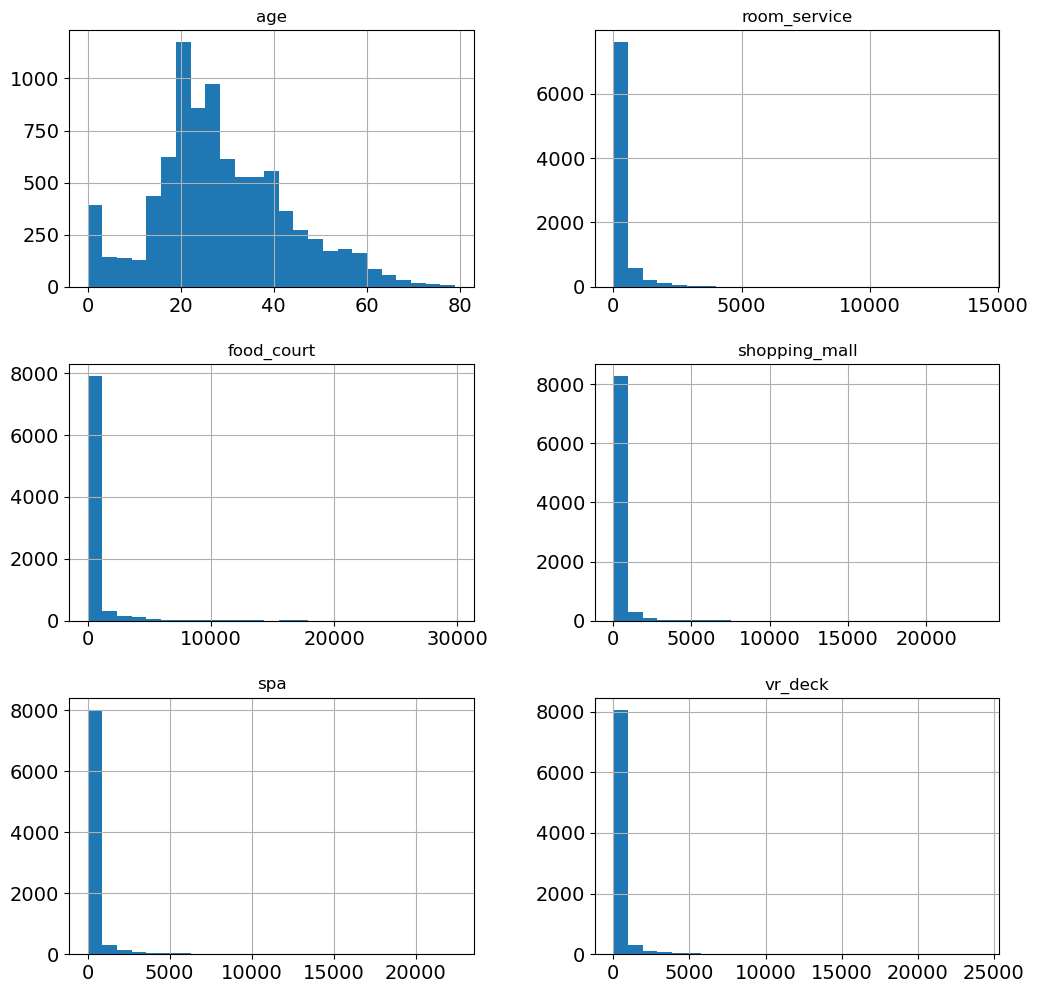

In [27]:
train_data.hist(bins = 25, figsize = (12, 12))
plt.show()


##### <b><span style='color:#4a8fdd'>|</span> Get the number of age periods of passengers</b>

In [31]:
for data in train_data:
    baby = train_data[train_data["age"] <= 5]
    kid = train_data[(train_data["age"] > 5) & (train_data["age"] <= 10)]
    teenager = train_data[(train_data["age"] > 10) & (train_data["age"] <= 20)]
    youth = train_data[(train_data["age"] > 20) & (train_data["age"] <= 40)]
    adult = train_data[(train_data["age"] > 40) & (train_data["age"] <= 60)]
    old = train_data[(train_data["age"] > 60)]
        
print("Number of baby passengers: ", baby.shape[0])
print("Number of kid passengers: ", kid.shape[0])
print("Number of teenager passengers: ", teenager.shape[0])
print("Number of youth passengers: ", youth.shape[0])
print("Number of adult passengers: ", adult.shape[0])
print("Number of old passengers: ", old.shape[0])

Number of baby passengers:  499
Number of kid passengers:  219
Number of teenager passengers:  1717
Number of youth passengers:  4527
Number of adult passengers:  1511
Number of old passengers:  220


<a id="5.3"></a>

##### <b>5.3<span style='color:#4a8fdd'>|</span> Barplot</b>

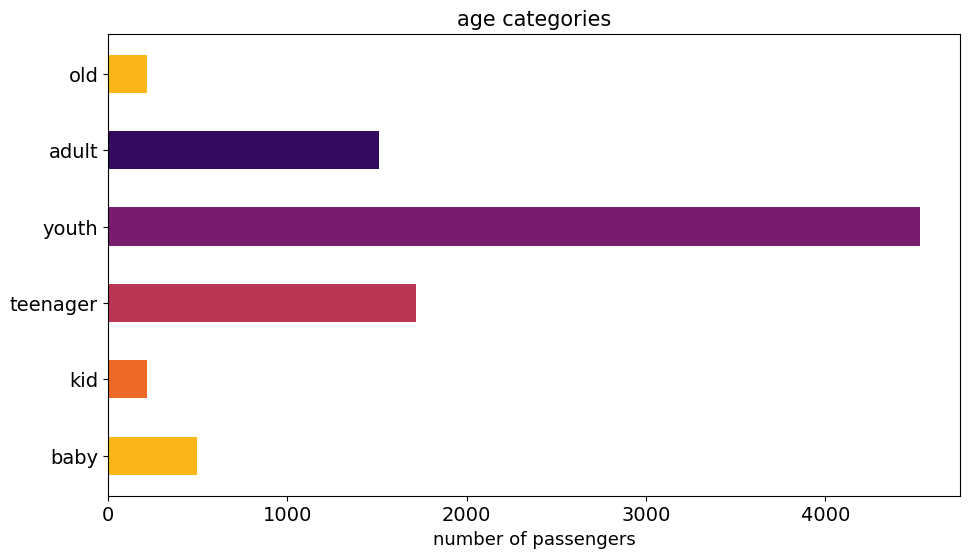

In [32]:
ages = {"baby" : baby.shape[0], "kid" : kid.shape[0],
        "teenager" : teenager.shape[0], "youth" : youth.shape[0],
        "adult" : adult.shape[0], "old" : old.shape[0]}
ages = pd.Series(ages)

plt.figure(figsize = (11, 6))
plt.title("age categories", fontsize = 15)
plt.xlabel("number of passengers", fontsize = 13)

plt.barh(ages.index, ages.values, color = sns.color_palette("inferno_r", 5),
         height = 0.5)
plt.show()

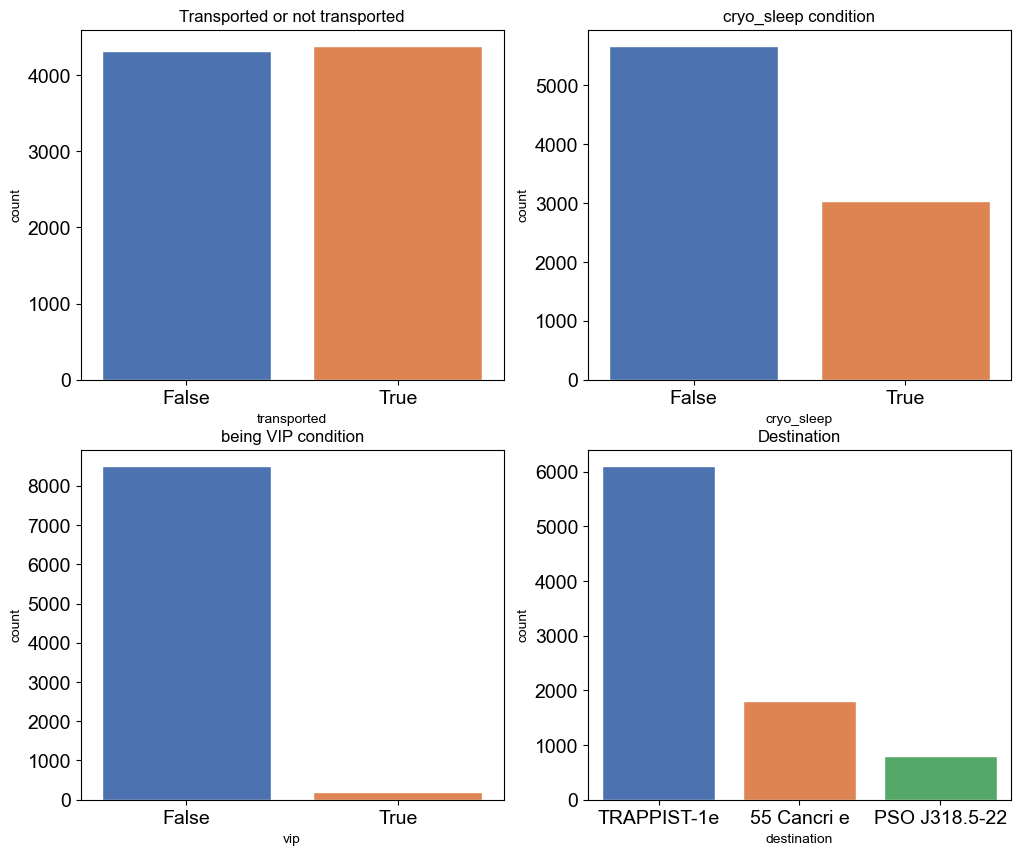

In [33]:
fig, axes = plt.subplots(2, 2, figsize = (12, 10))
axes = axes.flatten()
sns.set_theme(style = "whitegrid")
sns.barplot(ax = axes[0], x = train_data["transported"].value_counts().index,
            y = train_data["transported"].value_counts(),
            data = train_data, saturation = 1).set(title = "Transported or not transported");

sns.barplot(ax = axes[1], x = train_data["cryo_sleep"].value_counts().index,
            y = train_data["cryo_sleep"].value_counts(),
            data = train_data, saturation = 1).set(title = "cryo_sleep condition");

sns.barplot(ax = axes[2], x = train_data["vip"].value_counts().index,
            y = train_data["vip"].value_counts(),
            data = train_data, saturation = 1).set(title = "being VIP condition");

sns.barplot(ax = axes[3], x = train_data["destination"].value_counts().index,
            y = train_data["destination"].value_counts(),
            data = train_data, saturation = 1).set(title = "Destination");

<a id="5.7"></a>

##### <b>5.7<span style='color:#4a8fdd'>|</span> Pandas crosstab</b>

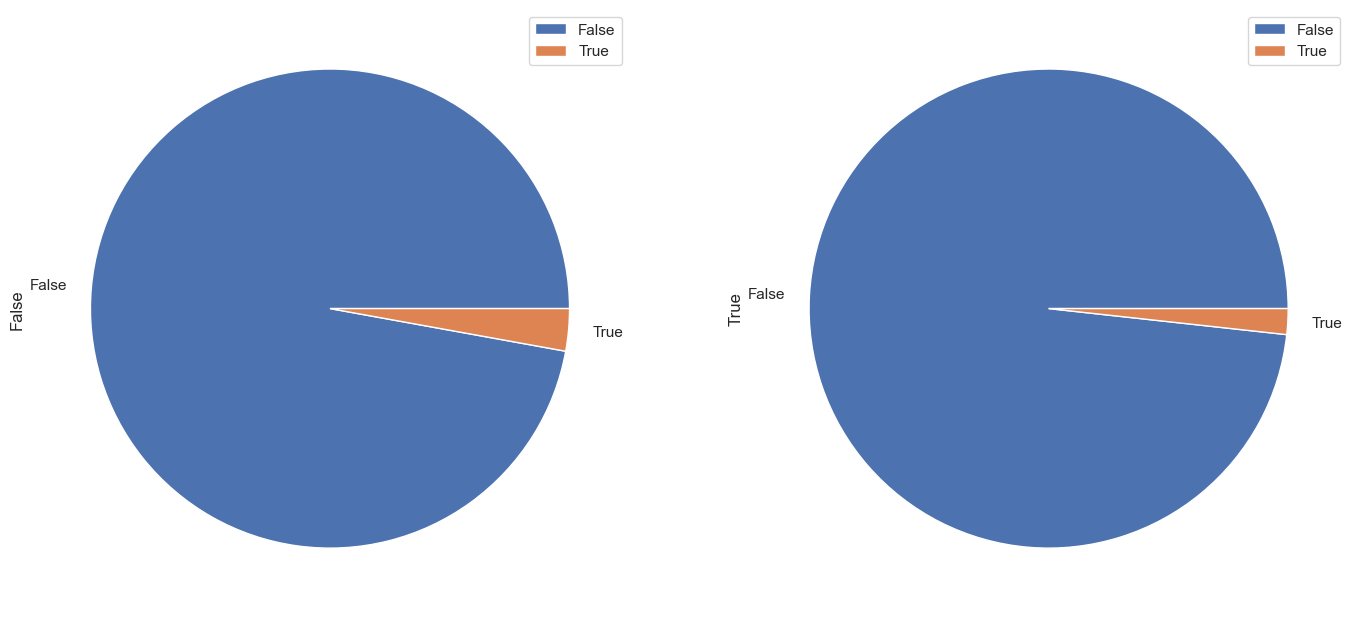

In [38]:
pd.crosstab(train_data["vip"], train_data["transported"],
            normalize = True).plot(kind = "pie",
                                   figsize = (17, 10), subplots = True, stacked=True);

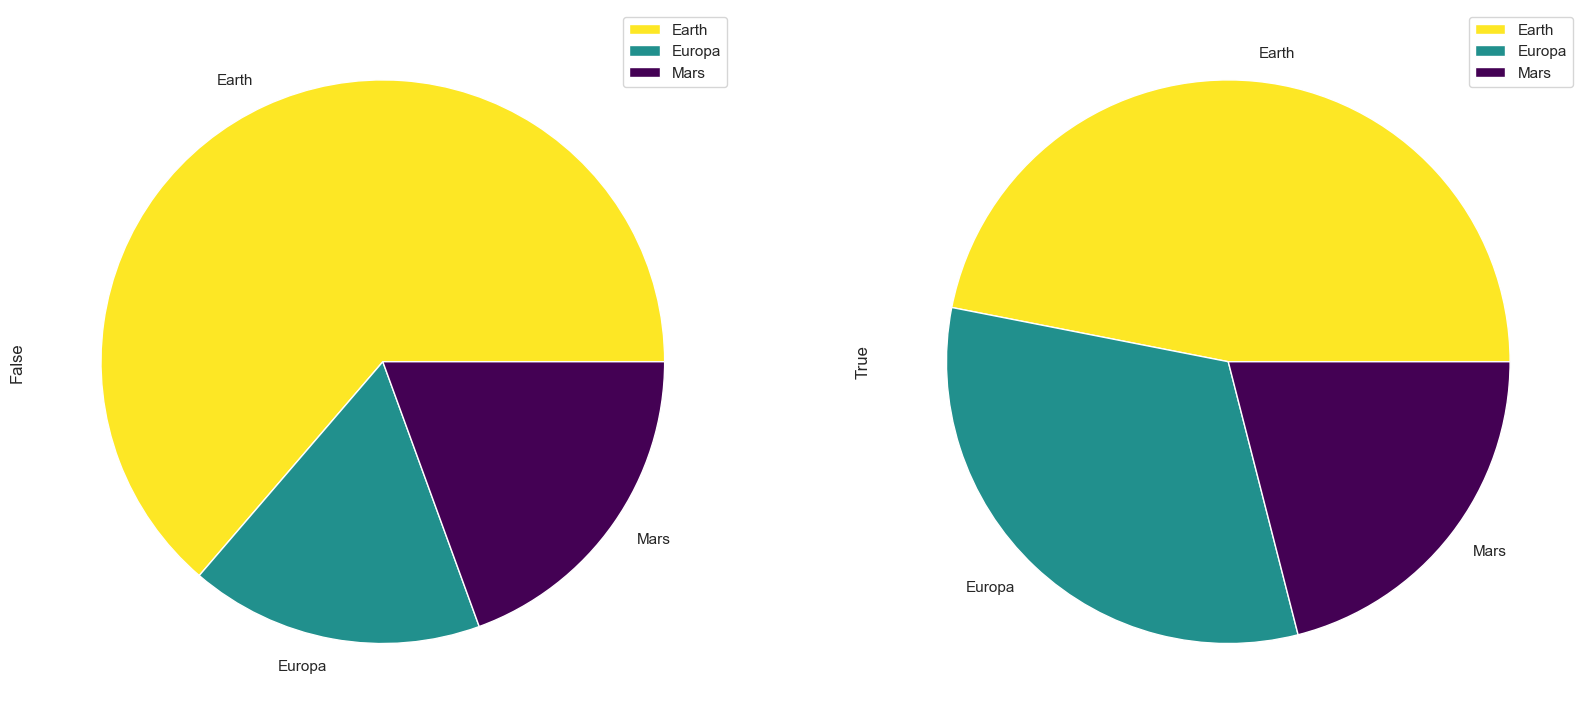

In [39]:
pd.crosstab(train_data["home_planet"], train_data["transported"],
            normalize = True).plot(kind = "pie",
                                   figsize = (20, 20), colormap = "viridis_r",
                                   subplots = True, stacked=True);